In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bin_data = pd.read_csv("/content/bin_data.csv")
multi_data = pd.read_csv("/content/multi_data.csv")

In [3]:
print(bin_data.head())
print(multi_data.head())


   Unnamed: 0           dur     spkts     dpkts    sbytes    dbytes      rate  \
0           3  2.802759e-02  0.001033  0.001089  0.000039  0.000053  0.000014   
1          11  3.488503e-02  0.005730  0.002541  0.003919  0.000151  0.000043   
2          15  3.333360e-08  0.000094  0.000000  0.000005  0.000000  0.500000   
3          17  6.559318e-03  0.000845  0.000726  0.000055  0.000075  0.000043   
4          21  5.633661e-03  0.000845  0.000545  0.000065  0.000018  0.000044   

       sttl      dttl     sload  ...  service_snmp  service_ssh  service_ssl  \
0  0.138393  0.992126  0.000001  ...           0.0          0.0          0.0   
1  0.138393  0.992126  0.000092  ...           0.0          0.0          0.0   
2  0.995536  0.000000  0.119792  ...           1.0          0.0          0.0   
3  0.138393  0.992126  0.000007  ...           0.0          0.0          0.0   
4  0.995536  0.992126  0.000009  ...           0.0          0.0          0.0   

   state_ACC  state_CON  state_F

In [4]:
print(bin_data.shape)
print(multi_data.shape)



(116352, 60)
(116352, 70)


In [5]:
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

X_train_reshaped = np.expand_dims(X_train.values, axis=2)
X_test_reshaped = np.expand_dims(X_test.values, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for multiclass classification


In [6]:
adam_optimizer = Adam(learning_rate=1e-4)
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_best_model.h5', monitor='val_loss', save_best_only=True)

cnn_history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping, model_checkpoint]
)



Epoch 1/50
1455/1455 [==============================] - 17s 11ms/step - loss: 38.4775 - accuracy: 0.4868 - val_loss: 1.1500 - val_accuracy: 0.6673
Epoch 2/50
  19/1455 [..............................] - ETA: 12s - loss: 1.3101 - accuracy: 0.5164

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1455/1455 [==============================] - 16s 11ms/step - loss: 0.9753 - accuracy: 0.6616 - val_loss: 0.5435 - val_accuracy: 0.8946
Epoch 3/50
1455/1455 [==============================] - 17s 12ms/step - loss: 0.7494 - accuracy: 0.7527 - val_loss: 0.5511 - val_accuracy: 0.8815
Epoch 4/50
1455/1455 [==============================] - 17s 11ms/step - loss: 0.6917 - accuracy: 0.7757 - val_loss: 0.4701 - val_accuracy: 0.9215
Epoch 5/50
1455/1455 [==============================] - 16s 11ms/step - loss: 0.5949 - accuracy: 0.8233 - val_loss: 0.4506 - val_accuracy: 0.9248
Epoch 6/50
1455/1455 [==============================] - 16s 11ms/step - loss: 0.5731 - accuracy: 0.8444 - val_loss: 0.3245 - val_accuracy: 0.9255
Epoch 7/50
1455/1455 [==============================] - 16s 11ms/step - loss: 0.4401 - accuracy: 0.8775 - val_loss: 0.2643 - val_accuracy: 0.9322
Epoch 8/50
1455/1455 [==============================] - 16s 11ms/step - loss: 0.3402 - accuracy: 0.9028 - val_loss: 0.2327 - val_accura

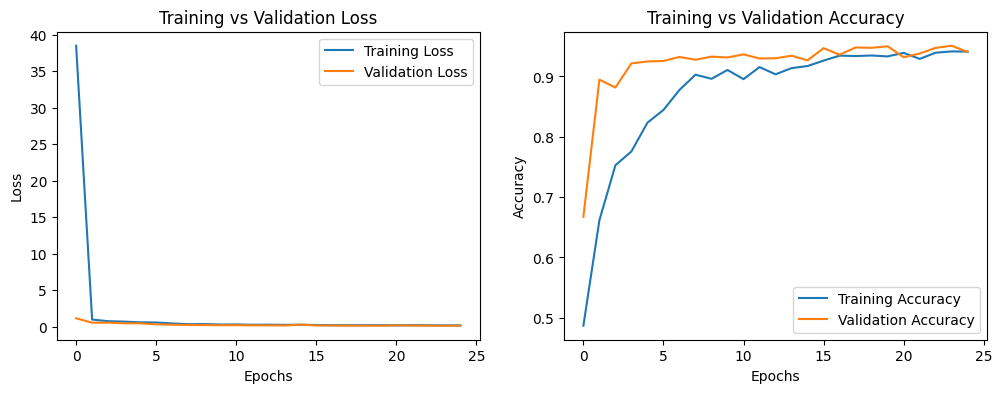

728/728 [==============================] - 2s 3ms/step - loss: 0.1299 - accuracy: 0.9499
Test Loss: 0.12991346418857574
Test Accuracy: 0.9499377012252808


In [7]:
def plot_training_vs_validation(history):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.show()

plot_training_vs_validation(cnn_history)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")